# Makine Öğrenmesi - Doğrusal Regresyon Modelleri

## Basit Doğrusal Regresyon 

### Model

In [2]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/data.html buradan indirlebilir verisetleri
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)] #burası olmasaydı indexte bi sıkıntı oluyordu. Görmek istersen burayı commente al.
df.head() #Bağımlı değişken satış değişkeni, diğerleri bağımsız değişken.
#bir şirketin reklam harcamaları neticesinde satışları verilmiş.
#Yani, tv-radyo-gazetelerde yapılmış olan reklam harcamalrı sonrasında satışların ne şekilde oluştğu ifade edilmiş.
#satışlar birimleştirilmiş. amacımız, satışları modelleyebilmek.yani reklam harcamaları neticesinde oluşan 
#satışları ne şekilde oluştuğunu modellemek.
#Biz burada basit doğrusal regresyon incelediğimizden, buradaki bir değişkeni seçip oradan devam edeceğiz. 

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


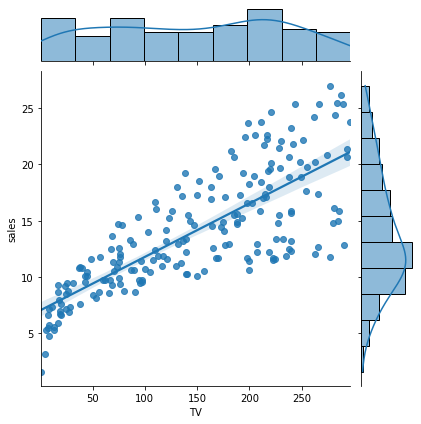

In [3]:
import seaborn as sns
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg"); #burada tv ve sales kısmını seçtik. bunlar üzerinden
# basit doğrusal reg incelemesini yapacağız. türümüz regresyon olacak dedik.

burada kabaca, satışlar ile tv arasındaki ilişkiyi görselleştirmiş olduk. burada diyor ki yani tv reklam harcamaları arttıkça, satışlarda bir artış olduğu gözlemleniyor. aralarında pozitif ve doğrusal yönde bir ilişki var.
şimdi,bu ilişkiyi modellemiş olucaz. makine öğrenmesi yaklaşımı ile, eğer elimize bir tv harcaması değeri gelir ise, buna karşılık satışların ne olabileceğini tahmin etmeye çalışıcaz.

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
X = df[["TV"]] #Bağımsız değişkeni x ile ifade edicez.

In [6]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [7]:
y = df[["sales"]] #Bağımlı değişkeni y ile ifade edeceğiz.

In [8]:
reg = LinearRegression() #model nesnesi oluşturduk.

In [9]:
model = reg.fit(X, y) #bu modeli fit et, bu modeli kur diyoruz.

In [10]:
model #model nesnesini getirdi. bununla ilgili bilgi vermiş. ama biz bunun içerisinden bişeyler almak istiyoruz.

LinearRegression()

In [11]:
str(model)

'LinearRegression()'

In [12]:
dir(model) #burada, bu nesnenin içerisinden alabileceğimiz bazı bilgileri gösteriyor.

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

Hatırlarsak, basit doğrusal regresyonda bir b0 sabitimiz vardı ve bir de b1 katsayımız vardı. Yukarıda gözüken intercept şeklinde ifade edilen şey sabittir. bunun ile bu sabiti çekebiliriz. coef ise katsayı demektir. modele ilişkin b1'de buradan çekebiliriz.

In [13]:
model.intercept_ #Sabitimiz. b0

array([7.03259355])

In [14]:
model.coef_ #Katsayımız. b1

array([[0.04753664]])

In [15]:
#rkare, modelin skorunu ifade ediyor. r^2 = Bağımlı değişkendeki değişikliğin, bağımsız değişkenlerce açıklanma yüzdesi.
#Yani bu örneğimizde, satışlardaki değişikliğin, yaklaşık %60'ı bağımsız değişkence açıklanmaktadır.
# satışların içinde bir varyans var, bir değişim var, işte bu satış değişkeninin içerisindeki değişimi, burada kullanmış
#olduğumuz tv değişkeni, işte bu değişimiz yaklaşık %60'ını açıklamaktadır.
model.score(X,y)

0.611875050850071

Dolayısıyla, elimizdeki verisetlerinde doğrusal regresyon modelleri ile ilgilendiğimizde, r^2 değerine baktığımızda şu bilgilyi elde ederiz: elimizdeki bağımsız değişkenleri kullandığımızda, bağımlı değişkendeki değişimin %kaçını açıklayabiliyoruz şeklinde bize değerli bir bilgi sunmakta.

### Tahmin

/Users/mustafa/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


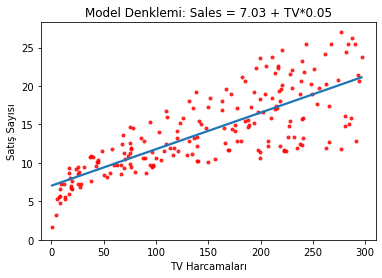

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9}) #Burada bir regresyon görselleştirmesi yapacağız dedik
#Tv ve sales değişkeni üzerinden, güven aralığı koyma dedik(ci=none), sonra da renklendirme parametreleri girdik.
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310) #x ekseni limitlerini ayarladık.
plt.ylim(bottom=0); #y eksenini de 0 dan başlattık.
# GÖRSELLEŞTİRME

Bulduklarımızı görselleştirdik. Sales değişkeni ile tv değişkeni arasındaki ilişki budur. Bu bir saçılım grafiği. Ortadaki mavi çizgi ise bulmuş olduğumuz model denklemi. Aşağıda da denklem yazmakta. Tahmin etmek ne demek? Biz veriyi kullanarak, verisetinin içerisinden bir sabit ve bir diğer sabiti bulmuş olduk. Ve bunlar belirli değerlerle çarpıldğında, burda 0.05 sabit,tv değişken, iki tane sabiti bulmuş olduk, tv değeri geldiğinde örneğin 250 değeri geldiğinde, 250 değeri 0.05 ile çarpılıyor, üzerine 7.03 eklenip satışlardaki karşılığı gelmiş oluyor. Yani biz aslında burada tahmin yapacak bir fonk üretmiş olduk.

Peki bununla nasıl bir tahmin işlemi gerçekleştiricez? Neden tahmin etmeye ihtiyacımız var? Ben bu yıl tv reklam harcamalarına ne kadar harcama-yatırım yaparsam satışlarım ne olur cevabının yanıtını veriyoruz. 

Sales = 7.03 + 0.05*TV

In [17]:
model.intercept_ + model.coef_*165 #Mesela 165 birimlik tv harcaması yaparsam satışlarım kaç birim olur? Tahmin ettik.

array([[14.87613922]])

grafik üzerinden bakarsak, 165 üzerinden yukarı doğru çıkacağız, b0'ı alacak, b1 ile eğimini alacak, sonuçta 165 değeriindeki doğru çizgimize ulaşacak, karşılığındaki y değerini verecek. Bizim bütün amacımız bu doğruyu bulmaktı. Bu doğruyu oluşturan şey zaten eğim ve yükseklik(sabit). 

In [18]:
model.predict([[165]]) #diyoruz ki bu modeli kullanarak, yukarıda model'i atamıştık nesneye, predict et. bizden bağımsız değişken
# değerini istiyor. Yani tv harcamaları değerini istiyor. biz buraya 400 de girsek, model bize tahminde bulunur. zira artık patter'i
# öğrendi tahmin yapabilir. elde olmayan değerler bile girilmiş olsa, tahmin yapılabilir.

array([[14.87613922]])

In [19]:
yeni_veri = [[5],[15],[30]] #mesela 3 harcama tahmini yapmak istedik. yani mesela 5 birimlik tv harcaması 15 ve 30 birimlik tv harcaması
#yapsak ne kadar satış olur bunlara bakalım dendi.

In [20]:
model.predict(yeni_veri) #kurmuş olduğum modeli kullanarak tahminde bulun diyoruz tekrar. hepsini tahmin etti.

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

## Artıklar ve Makine Öğrenmesindeki Önemi

**MSE: Hata Kareler Ortalaması**

**RMSE: Hata Kareler Ortalamasının Karekökü**

Elimizde bir algortma var. Örneğin önceki bölümde, basit doğrusal regresyon modeli idi. Veri içerisinden parametreleri öğrendik. Bu parametreleri kullanarak, tahminde bulunduk. Şimdi elimizde bir gerçek değerler var, bir de tahmin edilen değerler var. Amaç: gerçek değerler ile, tahmin edilen değerler arasındaki farkları minimum yapmak. Ve bizim, kurmuş olduğumuz modellerin başarısını değerlendirmek için, göz önünde bulunduracak olduğumuz metrikler de buna yönelik metrikler. Yani mesela, regresyon problemleri için MSE ve RMSE değerlerini kullanacağız. Bunlar yine gerçek değerler ile, tahmin edilen değerler arasındaki farkların ortaya çıkardığı yapıyı genelleştirerek bize sunan bir hata ölçüm metriği. Sınıflandırma problemlerinde de, doğru sınıflandırma oranına bakacağız.

Şimdi elimizde gerçek değerler var, tahmin edilen değerler var, bunların arasındaki farkların üzerinden optimizasyon işlemleri yapacağız. Modelleme mantığını anlamak önemli, tahmin etme mantığını anlamak çok önemli, fakat orta-ileri seviyede arka tarafta algoritma optimizasyonu dediğimiz şeyin ne yaptığını anlamak çok daha önemli. ileriki dönemler için. Mesela lightgbm, xgboost gibi algoritmaların arka tarafta yaptığı işlemler aslında artıklara-hatalara odaklanmak. Hatalar, gerçek değerler ile, tahmin edilen değerler arasındaki farklardır. İşte o algoritmalar, bu hatalara odaklanarak bunları optimize etmeye çalışmaktadır. Yapay sinir ağları, bunlara odaklanarak algoritmanın daha performanslı olmasını sağlamaya çalışır. Dolayısıyla bizim de burada, daha makine öğrenmesinin en başında artık dediğimiz hata dediğimiz kavramı çok iyi pekiştirmemiz gerekiyor.
Şimdi, verisetimizi x ve y olarak ikiye ayırmıştık.

In [21]:
y.head() #bunlar gerçek değerler.

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [22]:
model.predict(X)[0:6] # bir de biz, model kurmuştuk. Bağımsız değişken değerlerimizi yerine koyup, haydi ağımlı değişkeni tahmin edelim.

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [ ]:
# Yukarıdaki y, verisetimizin orjinal halindeki bağımlı değişkenimizin değerleri. Burası ise, kurmuş olduğumuz modeli kullanarak,
# bir tahmin etme işlemi gerçekleştirdik.Tahmin etmek için bağımsız değişkenlerimizin değerleri zaten veriseitmizin kendisi. x,yani
# buradaki tv harcamaları. tahmin et, tv harcamaları ile satışların ne olacağını dedik. Satışlar tahmin edildi. Yani burası tahmin edilen
# Yukarıdaki y ise gerçek değerler.
# Şşimdi elimizde bir gerçek değerler var, bir de tahmin edilen değerler var. Bakalım ne kadar Başarılı bir iş yapmışız.

In [23]:
gercek_y = y[0:10] #ilk 10 birim içerisinden bu başarıyı test edelim.

In [24]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [25]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis = 1) #Bu ikisini df haline getirelim.

In [26]:
hatalar.columns = ["gercek_y","tahmin_edilen_y"]

In [27]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [ ]:
# Şimdi artık ne demek? hataların içerisine yeni bir değişken ekliyoruz. buna hata diyoruz, artık da diyebiliriz. 

In [28]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [29]:
hatalar 
# Bazıları pozitif yönlü, bazıları negatif yönlü hatalarımıza eriştik. Yani mesela bir satış 22,1 iken biz 17,9 demişiz.
# her bir gözlem birimi için yapılan hatalar burada verilmiş. bunlar bizim gözlemler üzerinde yapmış olduğumuz hatalar.
# Peki şimdi şöyle bir merakımız olduğunu düşünelim: her birisi için bir hatamız var tamam ama, bize ortalama bir hata lazım olsun.
# ve örneğin, öğrenmiş olduğumuz mse değeri üzerinden bir hata hesaplamak istediğimizi düşünelim. mse'de hataların karesini alıyorduk.

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [30]:
hatalar["hata_kareler"] = hatalar["hata"]**2 # bu kareyi neden alıyorduk? buradaki - ve + değerler birbirini götürmesin diye.

In [31]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [33]:
import numpy as np
np.mean(hatalar["hata_kareler"])

9.290350329638104

In [ ]:
# burada yaptığımız şey: 10 tane gözlem birimi üzerinden kendimiz el yordamıyla hata kareler ortalamasını hesapladık yani bu, 
# bu modelimizin veriler üzerindeki testi sonucunda elde ettiğimiz ortalama hatamız.
# Yani bunu yaptığımızda şunu diyor oluruz: bizim modelimiz şu kadar başarılı, hata kareler ortalaması 9.22 birim demiş oluruz. 
# biz bunu 10 gözlem için yaptık. İlerleyen bölümler bu hata kareler ortlaması ve bunun karekökü gibi değerleri, daha büyük ölçekli 
# pandasın numpy bize sunduğu fonksiyonlar aracılığıyla ölçmüş olacağız.

## Çoklu Doğrusal Regresyon

### Model

In [8]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
X = df.drop('sales', axis=1) #Bağımsız değişkenler
y = df[["sales"]] #Bağımlı değişken(2 adet parantez olmazsa numpy array şeklinde gözüküyor)

In [10]:
y.head() #Bağımlı değişken(pd df şeklinde)

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [11]:
X.head() #Bağımsız değişkenler

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
# Statsmodels ile model kurmak
# Statsmodel ile, daha fazla bilgi alabileceğimiz doğrusal modellerin yapısına uygun bazı sonuçlar elde edicez. Daha sonra sckit learn ile
# sadece katsayılar ile ilgilendiğimiz uygulama yapmış olucaz.

In [12]:
import statsmodels.api as sm

In [13]:
lm = sm.OLS(y, X) 
# lm(LinearModel kısaltımını kullandık), ols yani reg modelini kurmak için gerekli olan fonk çağırıyoruz. Burada,
# 1.argümana bağımlı değişkeni, ikinci argümana bağımsız değişkenleri yazıyoruz. bu şekilde model nesnesini oluşturalım.

In [14]:
model = lm.fit() 
# fit işlemi yani modeli kurma işlemi yapalım. lm model nesnesini fit et dedik. yukarıda y,x girdiğimizden, burada girmemize
# gerek yok eğer üstte girmeseydik burada girecektik.

In [15]:
model.summary() #modelin özetleri. Çoklu doğrusal regresyonun model çıktısıdır. Birçok değerli bilgi sunmaktadır.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):                   2.43e-171
Time:                        12:58:48   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Burada önemli değerlerden birisi r^2 değeri. R^2 değeri: bağımsız değişkenlerin, bağımlı değişkendeki değişikliğin açıklama yüzdesidir. Verisetimizdeki bağımsız değişkenlerin, sales bağımlı değişkenini açıklama yüzdesi 0,98. Yani oldukça yüksek bir oran. Demekki satışlardaki değişimi açıklamak için çok iyi 3 tane değişkenimiz var demek. 
Bunun altında düzeltilmiş R^2 değeri isimli başka bir istatistik var. Bu da şu anlama geliyor: R^2 değerinin düzeltilmiş halidir. Yani, R^2 değeri, formulasyonu itibariyle, verisetine ne kadar değişken eklenirse eklensin, şişmeye meyillidir. Yani artmaya meyilllidir. Bu durum, modelde ilgili ya da ilgisiz birçok değişken bulundurma eğilimine sebep olmaktadır. Yani bir veri bilimci, bir model geliştirici, model geliştirme esnasında, verisetine yeni değişkenler eklediğinde, ve R^2 değerinde bir artma gözlemlediğinde, bu artmanın gerçekten açıklanabilirliğe katkı sağladığını düşünmektedir. Kİ BU YANILTICIDIR. Çünkü, R^2 istatistiği, formülasyonundan dolayı, ne kadar değişken eklenirse o kdar şişmektedir. İşte bu şişmenin önüne, bir düzeltme işlemi gerçekleştirilerek düzeltilmiş R^2 değeri oluşturulmuştur. Vw bu değer bize daha sağlıklı bir açıklanabilirlik oranı vermektedir.  
Bir diğer istatistik, F-İstatistiği. F-istatistiği, modelin anlamlılığını test etmek için kullanılan istatistiktik. F-İstatistiğine ilişkin altında p value değeri, burada prob olarak ifade edilmiş, yine 0,05ten oldukça küçük bir değer ve bu modelin anlamlı olduğu bilgisini bize veriyor. Bir model kurduk ama bu model anlamlı mı istatistiki olarak? statsmodel aracılığıyla şu an istatistiki olarak bir doğrusal reg modelini ele alıyoruz ve bu istatistik bize modelin anlamlı oluğ olmadığı bilgisini bize veriyor. 0,05ten küçük bir değer olduğundan dolayı model anlamlıdır diyoruz.

Aşağıdaki tabloyla ilgili yorumlama yapalım. Bu tablo verisetindeki değişkenlere ilişkin bazı bilgiler sunuyor. Buradaki coef ifadesi, kurulacak olan nihai modeldeki, bu bağımsız değişkenlerin katsayılarını ifade ediyor.b1,b2,b3 katsayıları yani mesela tvnin katsayısı 0.05. Standart hata, bu katsayıların standart hatasıdır. Elimizde bir katsayı var ama bu katsayı anlamlı mı diye sormuş olduğumuzda, t istatistiği ile ve p value değeri(prob. ile gösterilmiş yani probability olasılık) ile inceleyeceğiz. Burası (p değeri) incelenecek olursa, modellemek için kullanmış olduğumuz bütün değişkenler anlamlıdır. 

Sckit learnde böyle yorumlama yapma imkanımız yoktur. Bu yorumlamalar çok değerlidir. BUNA ÇOK DİKKAT ET İŞ GÖRÜŞMELERİ İÇİN.

 Katsayıları yorumlayalım. 
-tv coef katsayısının yorumu şudur: diğer değişkenler sabit varsayıldığında tv harcamalarında meydana gelebilecek 1 birimlik artış, bağımlı değişkenimiz-sales değişkeninde ortalama 0.05 birim artışa sebep olacaktır. Katsayıların yani değişkenlerin, bağımlı değişkenimizi nasıl etkilediğiyle ilgili bir yorum yapıyoruz. TV harcamalarında 1 birim harcama-yatırım yaparsam, bu satışlarda ortalama 0.05 birimlik artışa sebep olabilecektir.

-radyo harcamalarında 1 birimlik değişiklik olduğunda, 1 birimlik artıl olduğunda, satışlar da ortalama 0.22 değişiklik olmasını bekleriz.

TEMEL YORUMLAMALAR BUNLAR.

Özet:
-Modelimiz anlamlı(Prob/f-ist). değişkenlerimizin hepsi anlamlı(p>t). Kullandığımız bağımsız değişkenler, bağımlı değişkenin %98ini çaıklıyor ki bu oran çok çok iyi(adj. r^2).

Model kurma işlemini statsmodel aracılığıyla gerçekleştirmiş olduk.

In [ ]:
##scikit learn ile model kurmak

In [16]:
from sklearn.linear_model import LinearRegression
lm  = LinearRegression()

In [17]:
model = lm.fit(X, y) # Fit et, regresyon modeli kur dedik. Bağımsız değişkeni ve bağımlı değişkeni giriyoruz.

In [11]:
model.intercept_ #Sabitimiz.

array([2.93888937])

In [12]:
model.coef_ # Bağımsız değişkenlerimize ilişkin katsayı değerleri. 3 değişkenimiz vardı, 3 katsayı geldi.

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [ ]:
# Bu katsayılar statsmodelde bulduğumuzdan farklı. nedeni Arka tarafta, gerekli ilgili kütüphanelerin kullanmış olduğu 
# parametre tahmin yöntemleri. Bu ileri bir seviye. Biz genelde sckitlearn kullanacağız.

## Tahmin

**Sales = 2.94 + TV * 0.04 + radio * 0.19 - newspaper * 0.001**

Tahmin Fonksiyonumuz bu. Matematiksel bir fonk. Değişken değerlerini girdiğimizde, satışların ne olacağını tahmin etmeye çalışıyoruz. Bize buradaki katsayıları veren nedir? Algoritmadır. Doğrusal regresyon modelidir. 

30 birim TV, 10 birim radio, 40 birim gazete 

In [2]:
2.94 + 30 * 0.04 + 10 * 0.19 - 40 * 0.001

5.999999999999999

In [3]:
yeni_veri = [[300],[120],[400]]

In [4]:
import pandas as pd
yeni_veri = pd.DataFrame(yeni_veri).T #Bunu df e çevirmemiz gerekiyor çok değişkenimiz olduğu için. Transpozu aldık.

In [5]:
yeni_veri # şu anda burada bağımsız değişkenin değerlerini görüyoruz. 0=tv,1=radio,2=gazete gibi.

,0,1,2
0,300,120,400


In [18]:
model.predict(yeni_veri) #Model nesnesi ile tahmin yapıcaz. Parantez içi bağımsız değişken verileri.

array([[38.87688782]])

Burada ne yaptık? Biz bağımlı değişken-satış ve bağımsız değişkenler arasındaki ilişkiyi modelledik. Bu ilişkinin patternini, yapısını, nasıl ortaya çıktığını doğrusal fonksiyonel bir formülle ortaya koymuş olduk. Dolayısıyla bu fonksiyon, x'lere bağlı olarak dğişiyor. Bağımsız değişken değerlerine bağlı olarak değişiyor. Bağımsız değişken değerleri ne olursa olsun bunlara verisetinin içinden uygulanmış olan yöntem ile bulunmuş katsayılar uygulandığında sonuçlar hesaplanmış olacak. 

In [19]:
from sklearn.metrics import mean_squared_error 
# Başarısını değerlendirelim. Basit doğrusal regresyonda el ile yapmıştık. Şimdi bunu
# fonksiyonel yapılar ile hesaplayacağız. Burada MSE yani hata kareler ortalamasını uygulayacağız.

In [20]:
y.head() #Bunlar y'nin gerçek değerleri.

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [21]:
model.predict(X)[0:10] #Modeli kullanarak bağımsız değişken değerlerini yerine girerek tahmin ettiğmiz yŞapka değerleri.

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [22]:
MSE = mean_squared_error(y, model.predict(X)) #Soldaki y gerçek değerler, sağdaki y tahmin edilenler.
MSE #Birim başı yapılacak ortalama hatamız.

2.784126314510936

In [23]:
import numpy as np
RMSE = np.sqrt(MSE) #Hata kareler ortalamasının karekökü.
RMSE

1.6685701407225697

### Model Tuning (Model Doğrulama)

Aslında, diğer bütün makine öğrenmesi algoritmaları için model tuning basamakları ele alınacak. Hiperparametre optimizasyonları gerçekleştirilecek. Çoklu doğrusal reg modelinde bir hiperparametre olmadığından dolayı burada model tuning işleminden ziyade bir model doğrulama işlemi gerçekleştireceğiz. Konu bütünüğü açısından model tuning başlığı altında inceliyoruz. Ama burada yapacağımız şey model doğrulama.
Model doğrulama neyid? Sınama seti yaklaşımı ve K-Katlı çapraz doğrulama yaklaşımlarını görmüşdük. İşte bu yaklaşımları burada verisetimizi test-train olarak ayırıp, bunların üzerinden bir model doğrulama işlemini gerçekleştirmiş olucaz.

In [24]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [25]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [26]:
#sinama seti
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
# Burada x ve y yi train ve test işlemine tabi tutucaz. Fonsiyonda 1.argümanda x 2. argümanda y yazıyoruz. Test size, kaça kaç bölünecek
# Onu belirtiyoruz. Random state her çalıştığında farklı sonuç gelmesin diye yazılıyor.

In [28]:
X_train.head() #Şu anda verisetini test ve train olarak ikiye ayırdık. Train seti içerisinde bağımsız ve bağımlı değişkenler olacak,
# test seti içerisinde bağımlı ve bağımsız değişkenler olacak. İkisinde de. Burada train setinin bağımsız değişkenlerini görüyoruz.

,TV,radio,newspaper
108,13.1,0.4,25.6
107,90.4,0.3,23.2
189,18.7,12.1,23.4
14,204.1,32.9,46.0
56,7.3,28.1,41.4


In [30]:
y_train.head() #Train setinin bağımlı değişkeni de bu.

,sales
108,5.3
107,8.7
189,6.7
14,19.0
56,5.5


In [29]:
X_test.head() # Test setinin bağımsız değişkenleri.

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [31]:
y_test.head() # Test setinin bağımlı değişkeni.

,sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6


Train ile modelimizi fit edicez. Test ile de test edeceğiz. train_test_split fonksiyonu ile verisetimizi train test olarak ayrdık.

In [32]:
lm = LinearRegression()
model = lm.fit(X_train, y_train) #Traindeki bağımsız ve bağımlı değişkenini yazdık. Train için modelliyoruz.

In [33]:
# egitim hatasi
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
# gerçek değerler ve tahmin edilen değerleri girmemiz gerekiyor. model predict ile tahmin değerlerini buluyoruz. X_train yazdık. Neden?
# Çünkü train seti içerisindeki bağımsız değişkenin değerlerini kullanarak bir tahminde bulunucaz. Bu bulduğumuz tahminleri yine train
# içerisindeki y'nin gerçek değerleri ile karşılaştırıcam.
# Burada bulduğumuz hata, train hatamız.

1.7369025901470923

In [34]:
# test hatasi
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.4113417558581578

Özetle, Verisetimizi train ve test olarak ikiye böldük. Train üzerinde bir model kurduk. Ve kurmuş olduğumuz modelimize ilişkin hatamızı hesapladık. Daha sonra ayırmış olduğumuz test setini de göz önünde bulundurarak, test seti için de bir hata hesapladık. Bu sınama seti yaklaşımıyla hata hesaplama işlemiydi.

Yukarıdaki random state'i değiştirirsek, bu hata değerlerimiz de değişecektir. Nedeni, verisetinin içerisindeki hangi 80/20'yi alacağız. Bunlar değiştiği için hatalar da değişmekte. Bir rastegele işlemde farklı 80/20, başka bir rastgele işlemde farklı 80/20 alınabilir. Bu da sonuçları yanıltıcı olarak değerlendirmemize sebep olabilir. İşte bu sebeple, K-Katlı CV kullanıyoruz. Train setine yönelik elde edecek olduğumuz hatayı daha doğru değerlendirebilemk adına K-Katlı CV yöntemini kullanmış olucaz.

In [ ]:
# k-katlı cv(cross-validation)

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")
#1.argümana modeli yazıyoruz. 2.argüman bağımsız değişkenleri ifade ediyor.daha sonra bağımlı değişkenimizi ifade ediyoruz. cv kaç katlı
# olsun diyor. 10 katlı olsun dedik. scoring argümanı ise, hata kareler ortalaması diye dolduruyoruz.

array([-1.62375953, -3.81875608, -3.43828142, -2.27748673, -7.25325414,
       -1.88303708, -2.80517715, -3.68594486, -1.12810834, -3.96330989])

Ne oldu? Train seti üzerinden 10 tane farklı hata hesaplandı. Yani train seti kendi içinde 10 parçaya bölündü, 9 parça ile önce model kurulup, dışarıda kalan 1 parça tahmin edildi. Bir hata elde edildi. sonra diğer parça dışarıda bırakılıp, 9 parça ile model kurulup, dışarıda bırakılan parça tahmin edilmeye çalışıldı. Ve bu şekilde 10 tane hata elde edildi. Bunu trainin üzerinde yapıyoruz. Netice itibariyle bunların ortalamasını aldığımızda, elimizde tek bir tane traine ilişkin hata olacak. Fakat buradaki değerler negatif. Bu fonksiyonun kullanımıyla ilgili bir durum. Başına bir eksi işareti koyup ortalamasını al dediğimizde, ortalama hata gelmiş olacak.

In [37]:
#cv mse
np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

3.187711520944358

Yani train setimize ilişkin ortalama hatamız bu. Bunun karekökünğ alırsak, RMSE değerine erişmiş oluruz. Tabi bu sadece train seti üzerinde bir işlemdi.

In [38]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

1.7854163438661466

Eğer CV yöntemi ile sınama seti yöntemini karşılaştırmak ana amacımız ise, bu durumda sadece x ve y yazarsak bu işlemi de gerçekleştirecektir.

In [39]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model, X, y, cv = 10, scoring = "neg_mean_squared_error")))

1.7492763126843378

Ama burada tüm veriyi tek bir veri olarak kabul etti. Teorik bölümde gördüğümüz, genelde bazı kafa karışıklıklarına sebep olan kısım burası. Tavsiye: çalışmanın başında eğer veriseti kümeniz yeteri kadar büyük ise, en son nihai testleri yapmak üzere bir test setini dışarıda bırakmanız, dışarıda ırakılan bu test setini daha sonra en son modeli oluşturduğunuzda tet etmeniz. Yani CV işlemini train setini sanki tek bir veri gibi kabul edip, bunun üzerinde gerçekleştirmeniz. Tıpkı iki satır üstte yaptığımız gibi. Test seti her zaman dışarıda kalmalı. O test seti dışarıda iken (tabi eğer veriseti yeteri kadar büyük ise) elimizdeki train setini ikiye bölüp, sanki test ve train buradaymışçasına hareket edip, ki bunu çapraz doğrulama ile validayon yöntemine yaptırıp, yani biz burada şu anda crosvalscore fonksiyonunu çalıştırdığımızda buraya girmiş olduğumuz x_train ve y_train sanki tek bir veriymiş gibi kabul ediliyo, bu kendi içinde 10 katlı işlemi periyodik olarak hepsine yapılıyor. Yani kendi içinde 10 tane parçaya bölüyor bunu. 

PEKİ BU DEĞER NE DEMEK? biz bu işlemi neden yaptık? Daha önce basitçe bir test hatası eğitim hatası işlemi yapmıştık. Neden böyle bir işleme gerek duyduk? Bu işlem bize, sadece tek başına test ve trainin vermiş olduğu hatadan daha doğru bir hata ölçüsü verir. Yani DOĞRULANMIŞTIR. Modeli doğrulamak demek, bu demektir. Verisetinin içerisinden seçilebilecek farklı varyasyonlara ilişkin bir hata hesaplaması yapılır. Bir defa değil mesela burada 10 defa yapılır. Dolayısıyla hepsinin ortalaması alındığında bize ilkel yöntem diyebileceğimiz, ilkel test hatasıi ilkel train hatası diyebileceğimiz hatalara göre valide edilmiş hatayı verir. CV, doğrulanmış bir hata verir. 

# Ridge Regresyon

### Gerekli Kütüphaneler

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

### Veri Seti

In [2]:
df = pd.read_csv("Hitters.csv") #Veriyi okuduk.

df = df.dropna() #İçindeki eksik değerleri direkt sildik.

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])#Kategorik değişkenleri, dummy değişkene çevirdik.
#KAtegorik değişkenlerin bize sağlacak olduğu bilgiyi daha iyi alabilmek adına one hot encoding yaklaşımı yapmış olduk.

y = df["Salary"] #Bağımlı değişkenimiz salary

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64') #Bağımsız değişkenleri oluşturmadan önce, dummy sonrası
#değişkenlerin kendileri var burada, bunlar kategorik değişkenler. Bunları ve bağımşı değişkeni verietinden çıkartıyoruz.

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1) #Daha sonra original veriseti ile bu yukarıdakini birleştirdik.

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)#test-train ayrımı yaptık.75/25 şeklinde.

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


Amacımız: salary(oyuncuların maaşı) değişkenini, diğer değişkenleri kullanarak tahmin etmeye çalışmak. 
Verisetinin hikayesi: beyzbol oyuncularına ait veriseti. Bu verisetinin içinde oyunculara ilişkin maaşları, oynadıkları lig, attıkları sayı, koşuları vb. bir takım bilgiler var. Burada bizim için önemli olan maaş değişkeni. Başka senaryoda hits isimli değişken de önemli olabilir vs.vs.
Problemimiz: Kulüp başkanı diyor ki, ben bir oyuncu transfer etmek istiyorum. Ama oyuncuya ne kadar bedel belirtmem gerektiğini bilmiyorum. Elimde geçmiş veriler var. Geçmiş verilere bakarak bana öyle bir değer söyle ki, bu kişiye ona göre bir maaş vermek adına bir yorumlama yapabileyim.
Aynı zamanda bu çalışma aracılığıyla, Yüksek potanasiyel ifade eden pyuncular tespit de edilebilir. Mesela, maaşı çok yüksek olması gerektiği halde, mevcut maaşı düşük olan oyuncular transfer listesine eklenebilir.

Aslında, bu verinin görselleştirilmesi betimsel istatistiklerine bakılması, birbirleri ile çaprazlanarak verisetinin daha yakından tanınmaya çalışılması gibi bir dizi işlemin de gerçekleştirilmesi gerekiyor. Fakat buradaki çalışma kapsamında, veri ön işlemeye ya da veri manipülasyonuna, keşifçi veri analizine ilişkin işlemleri gözardı ederek devam edeceğiz.

In [4]:
df.shape

(263, 20)

In [5]:
ridge_model = Ridge(alpha = 5).fit(X_train, y_train) #Ridgemodelimizi nesnesi oluşturduk. train seti üzerinden fit ediyoruz. eğitiyoruz.
# alpha parametresini biz giriyoruz. Yani lambda

In [6]:
ridge_model

Ridge(alpha=5)

In [7]:
ridge_model.coef_ #katsayılar. Farklı lambda değerlerine karşılık, farklı katsayılar oluşacak ve her farklı lamda değeriyle oluşan katsayılar
#üzerinden kurulan modeller ve bunların neticesinde ortaya çıkan hatalar incelenecek. Buna göre optimum alphaya yani lambdaya karar verilecek

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [8]:
ridge_model.intercept_ #sabit katsayımız.

-3.425196868715034

In [9]:
np.linspace(10,-2,100) #Bu ne demekti? 10/-2 arasında 100 tane değer ver demek

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [10]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [11]:
lambdalar #birbirinden farklı birçok lambda elde ettik.

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Şimdi amacımız şu: bu oluşturduğumuz lambda değerlerine karşı katsayıların nasıl değişecek olduğunu gözlemlemeye çalışmak.

In [12]:
ridge_model = Ridge() #ridge model isminde ridge nesnesi oluşturduk
katsayilar = [] # daha sonrakatsayılar isminde boş bir liste oluşturduk.

# şimdi döngü aracılığıyla ortaya çıkan bu durumu gözlemlemiş olucaz.

for i in lambdalar:
    ridge_model.set_params(alpha = i) #paramaetreleri set etme işlemi. i ye göre alphayı değiştirecek.
    ridge_model.fit(X_train, y_train) #artık i ye göre parametre ayarlandı. şimdi fit ediyoruz.
    katsayilar.append(ridge_model.coef_) #çıkan her bir alpha değerine karşılık gelecek şekilde oluşturulan modellerin katsayılarını listeye ekliyoruz.
    
# DİKKAT: Her lambda denemesinde bir çok katsayı olacak. Her lambdanın 19 tane(bağımsız değişken sayısı kadar) katsayısı olacak. 
    

In [13]:
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

Burada HER BİR LAMBDA değerine karşılık, DEĞİŞKEN SAYISI KADAR beta katsayıları türetilmiş oldu. Şimdi bu durumu gözlemleyebilmek adına bir grafik oluşturucaz.

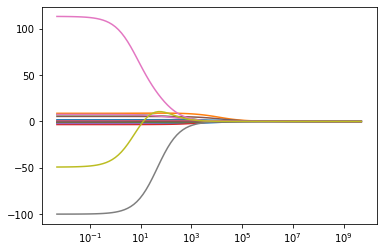

In [14]:
ax = plt.gca() # nesne özelliği tanımladık.
ax.plot(lambdalar, katsayilar) # neyi görselleştiricez? lambdaları görselleştiricez ve bunlara karşılık katsayıları görselleştiricez.
# Yani her bir lambda değerine karşılık gelecek şekilde katsayıların nasıl oluştuğu bilgisine erişmeye çalışıcaz.
ax.set_xscale("log") # katsayılar birbirinden farklı olabilecek olduğundan dolayı, hepsini görebilmek adına bir ölçek değiştirme işlemi.
# Logaritmik dönüşüm yaptık.

Farklı lambda değerlerine karşılık olacak şekilde, farklı katsayıların nasıl oluştuğu bilgisi bizimle paylaşıldı. Buradaki birbirinden farklı renkler, katsayıların değerlerini ifade ediyor. x ekseni, lambda değerlerini ifade ediyor. Yani burada, farklı lmbda değerlerine karşılık, elimizdeki parametrelerin (katsayıların yani) nasıl değiştiği bilgisi verilmiş oluyor. Burada, lambdalar arttıkça kafasına vura vura(lol) bunları sıfıra yaklaştırmış. Ridge regresyon, anlamsız parametreleri sıfıra yaklaştırır. Bu katsayılar öyle bir yerde durmalı ki, HK ort. karekökü değerini ya da toplam hata kare değerini minimum yapmalı. Bunun da hangi değerlere karşılık geldiği bilgisini değerlendirmiş olacağız.

Sonraki bölümde, amacımız optimum lambda değerini hataları da göz önünde bulundurarak seçmek olacak. Burada yaptığımız, farklı lambda değerlerine karşılık, beta katsayılarımızın ne olduğunu, değerlerinin nasıl değiştiğini görsel bir teknik ile ele almaktı.

## Tahmin

In [15]:
ridge_model #alpha değerimiz en son 0.005 olmuş

Ridge(alpha=0.005)

In [16]:
ridge_model = Ridge().fit(X_train, y_train) #model nesnemiz. kurmuş olduğumuz modelimiz. MAKİNE ÖĞRENMESİ MODELİ KURDUM DEMEK BU.

In [17]:
y_pred = ridge_model.predict(X_train) #tahmin için predict kullanıyoruz.

In [18]:
y_pred[0:10] #bunlar tahmin edilen değerler

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [19]:
y_train[0:10] #bunlar gerçek değerler.

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [20]:
# train hatası
RMSE = np.sqrt(mean_squared_error(y_train, y_pred)) #rmse'yi hesapla dedik. Neyin üzerinden hesaplayacak? ygerçek ve ytahmin.
RMSE #train setine ilişkin rmse. TRAİN SETİ ÜZERİNDEN VALİDE EDİLMEMİŞ HATA.

289.34470696006565

Bu bizim train hatamız. Ama valide edilmemiş train hatamız. Bunu valide etmek istersek CV kullanmamız gerekiyor. Yine traine ilişkin bir hata alacağız ama valide edilmiş bir train hatası alacağız.

In [21]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
# CV YÖNTEMİ İLE 10 KATLI HATA HESAPLAMA İŞLEMİ. DAHA DÜŞÜK OLMASI OLMAMASI DEĞİL, bu kısımdaki hata daha doğru bir hata. 
# Daha doğru bir hata elimizde olursa, model optimizasyonu için daha doğru bir hata bulundurmuş oluruz ve buna göre hareket ederiz.

351.3931585606319

Ama biz ileriki bölümlerde CV'ı burada yapmayacağız. İlkel yöntem ile train üzerinden train hatamızı bulmuş olacağız. Zira model optimizasyonu bölümünde CV yöntemiz ile hata hesaplıyo olucaz. Yani bunu model optimizasyonunda yapıcaz.

In [22]:
# test hatası
y_pred = ridge_model.predict(X_test)#test setine ilişkin tahmin edilen değerlere erişeceğiz. modeli xtest seti üzerinde tekrar çalıştırıcaz.

In [23]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred)) # buradaki y_pred artık, test bağımsız değişkenleri kullanılarak hesaplanmış olan testin
# bağımlı değişkenleri, tahmin edilen değerleri. y_test, test setinin y değerlerini yani gerçek bağımlı değişken değererine erişmiş oluruz.
RMSE

356.80829057302384

## Model Tuning

**Neden Model Tuning?**
modellemek nedir? modellemek, veriseti içerisinde bapımlı ve bağımsız değişkenler arasındaki ilişkiyi modellemek. Yani öğrenmek. Bu öğrenme işlemini üzerindn tahmin yapabiliriz. 
Tahmin etmek? kurmuş olduğumuz yani öğrenmiş olduğumuz veriseti yapısını kullanarak, onu bir fonksiyonla temsil ederek, ya da bir karar kuralıyla temsil ederek, tahminde bulunmak. 
model tuning neden? 
lamdanın ne olması gerektiğini bilmiyoruz. Bu yüzden deneme yanılma yoluyla, hiperparametreleri tune ediyoruz.

In [24]:
ridge_model = Ridge(1).fit(X_train, y_train) #ridge ile train üzerinden modelimizi fit ettik. buradaki 1, alpha değerimiz.

y_pred = ridge_model.predict(X_test) #bu modeli kullanarak, test yapmak aracılığıyla predict fonksiyonunu kullanarak, test setimizin bağımsız
#değişken değerlerini aldık. ve tahmin ettik. neyi tahmin ettik? test setinin bağımlı değişkenlerini

np.sqrt(mean_squared_error(y_test, y_pred)) #tahmin edilen bu bağımlı değişken değerleri ile test setinin gerçek değerlerini karşılaştırarak
#Hatamızı hesapladık.

356.80829057302384

In [32]:
np.random.randint(0,1000,100) #bşz hangi lambda değeri min verecek bilmiyoruz. o halde birçok değeri deneyelim. random sayılar.
# 0-1000 arası random 100 sayı.

array([779, 716, 399, 669, 789, 849, 732,  77, 694, 752, 591, 664, 207,
       347, 411, 181, 919,  13, 731, 565, 940, 227, 954, 677, 842, 485,
       501, 821,  84, 902, 718,  95, 127, 251,  98, 527, 547, 359, 324,
       115, 675, 898, 950, 118, 608, 882, 345, 318, 260, 550, 755,  35,
       579, 771, 758, 690, 676, 239, 418, 242, 486, 978, 958, 665, 730,
       899, 372, 484, 131, 750,  49, 742, 835, 494, 917, 523, 121, 992,
       279, 428, 207, 857, 472, 157, 968, 173,  97, 673, 490, 810, 452,
       638, 149, 985, 998, 856, 412, 231, 396, 407])

In [33]:
lambdalar1 = np.random.randint(0,1000,100) #bu işlem ile hiperparametreleri tune etmiş oluyoruz yani model tuning.

In [27]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5 #önceki bölümde oluşturduğumuz.

In [34]:
ridgecv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([859, 107, 534, 963, 851, 409, 994, 272, 508, 679, 787, 678, 507,
       454, 350, 455, 965, 885, 670, 361, 238, 703, 568, 905, 278, 395,
       680, 259, 914, 561, 228, 604, 988, 666, 201, 831, 381, 297,  94,
       894, 176, 290, 158, 261, 862, 963, 436, 828, 657,  38, 137,  37,
       426, 713, 237, 129,  22, 145, 375, 548, 748, 366, 959, 522,  99,
       434, 439, 872, 650,  52, 420,  16, 326, 411, 396, 364, 175, 271,
       670, 336, 731, 997, 362, 716,  65, 652, 990, 117, 389, 656, 974,
       661, 575, 293, 794, 943, 260, 216, 851, 369]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

Çeşitli denemeleri yaptıktan sonra, çeşitli lambda değerlerine karşılık, çeşitli hataları hesaplamış oldu.

In [35]:
ridgecv.alpha_ #bunun ile optimum parametreyi alabiliyoruz.

16

In [ ]:
#final modeli 

In [36]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train) #tune edilmiş final modelimiz.

In [37]:
y_pred = ridge_tuned.predict(X_test) #tuned reidge ile xtest kullanarak y tahmin et.
np.sqrt(mean_squared_error(y_test, y_pred)) #test hatamız.

356.3699926835376

# Lasso Regresyon

### Gerekli Kütüphaneler

In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

### Veri Seti

In [39]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

Hikayemiz yine aynı. Yukarıda olduğu gibi maaş tahmini.

In [40]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [41]:
df.shape

(263, 20)

In [42]:
lasso_model = Lasso().fit(X_train, y_train) #Lasso() içine lambda değeri gelecek. Şimdi boş bıraktık.

/Users/mustafa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850373, tolerance: 3898.686956380658
  positive)


In [6]:
lasso_model #lambda vermedik. lambdayı 1 almış.

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
lasso_model.intercept_ #modelin içerisinden sabiti alabiliyoruz. biliyoruz.

-5.587450677336392

In [44]:
lasso_model.coef_ #Katsayılar.

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [ ]:
#farklı lambda degerlerine karsilik katsayilar

In [45]:
lasso = Lasso() #lasso nesnesi oluşturduk
coefs = [] #katsayılar listesi oluşturduk. boş.
alphas = 10**np.linspace(10,-2,100)*0.5 #bir alphas seti oluşturduk.
for a in alphas:
    lasso.set_params(alpha = a) #alphayı sırayla deniyoruz yani.
    lasso.fit(X_train, y_train) #bu alphaya göre fit ediyoruz.
    coefs.append(lasso.coef_) #coef-katsayı değerini listeye ekle.

/Users/mustafa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741420507, tolerance: 3898.686956380658
  positive)
/Users/mustafa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679615766, tolerance: 3898.686956380658
  positive)
/Users/mustafa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.7561375573277, tolerance: 3898.686956380658
  positive)
/Users/mustafa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You m

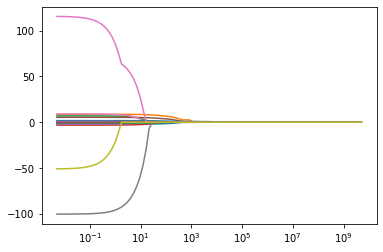

In [46]:
ax = plt.gca() #görselleştiriyoruz. ax isimli nesne oluşturduk.
ax.plot(alphas,coefs)
ax.set_xscale("log") #katsayıları gözlemleyebilmek adına, görünme adına bir ayarlama işlemi gerçekleştiriyoruz.

Özet ile, lasso, yeteri kadar büyük lambda değerleri gelirse ben bu katsayları sıfıra yaklaştırırım diyor. Bu şekilde de farklı lambda değerlerine kaarşılık katsayıların ne olduğu bilgisine erişmiş olduk. Görsel ile. 
Görselde, görünür bir şekilde katsayıların değişimi ve bu değişime ilişkin bilgiyi sunmuş oldu. Belirli bir noktaya kadar katsayılar sıfırın etrafındayken, sıfıra yaklaşmışken, belirli bir noktadan sonra ise artık sıfırlar. Ridge de ise bu sayılar sıfıra yaklaşıyor ama asla sıfır olmuyordu. Lassoda ise, parametre değerleri arttıkça, değiştikçe, modelimizin içinde kullanılan beta katsayılarının değerleri de sıfır olmuş ya da sıfıra yaklaşmış.

## Tahmin

In [15]:
lasso_model #model tuning de bu alphayı optimize etmeye çalışıcaz.

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
lasso_model.predict(X_train)[0:5] #train seti için tahmin etme işlemi yaptık.

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [48]:
lasso_model.predict(X_test)[0:5] #test seti için de tahmin etme işlemi yaptık. Yani test setinin bağımsız değişkenlerini kullanarak, test
# setinin bağımlı değişkenlerini tahmin et demek.

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

**Hatırlatma:** 

* verisetimizi eğitim ve test olarak ikiye ayırdık. Yani aslında elimizde 2 tane ayrı veriseti var. Bu iki ayrı veriseti içerisinde, bağımsız değişkenler ve bağımlı değişken var. Dolayısıyla istersem eğitim seti içerisinde bir model kurup, bu modelle ilgili konuşabilirim. İstersem test seti ile bir model kurup, bununla ilgili konuşabilirim. İkisi de verinin kendisi. Sadece ikiye böldük. 

* Ne için ikiye bölmüştük? Eğitim seti ile modelimizi eğitiyoruz, yani içerisinde bağımsız değişkenleri ve bağımlı değişkenleri olan eğitim seti ile model kurmak için ilgileniyoruz. Modeli kurduk. Bu kurmuş olduğumuz modeli kullanarak örneğin eğitim seti içerisindeki bağımsız değişken değerlerini kullanıp, bağımlı değişkeni tahmin ediyorum(yukarıda parantez içi X_train olan). Yine train seti ile kurmuş olduğumuz modeli kullanarak test setinin içerisindeki bağımsız değişkenleri kullanıp, test seti içerisindeki bağımlı değişkenin değerlerini tahmin ediyoruz.

In [49]:
y_pred = lasso_model.predict(X_test) #test hatasını buluyoruz bu kısımda. test setindeki bapımsız değişken değerleri kullanarak, test setinin
#içerisindeki bağımlı değişkenin değerini tahmin et diyoruz.

In [50]:
np.sqrt(mean_squared_error(y_test, y_pred)) #Hata kareler ort. Karekökü değerimizi hesapladık. İlkel test hatamız. Optimize edilmedi. ondan.

356.09758845540324

In [51]:
r2_score(y_test, y_pred) #r^2 skoruna bakıyoruz. Modelin açıklanabilirliğini ifade etmektedir.Regresyon problemleri için ok önemli bir ölçüt.
# Bağımsız değişkenlerce, bağımlı değişkendeki değişikliğin açıklanma yüzdesidir.

0.414227981323662

## Model Tuning

In [52]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [53]:
lasso_cv_model = LassoCV(alphas = alphas, cv = 10, max_iter = 100000).fit(X_train, y_train) #aranacak alphaları verdik. np.sqrt düştü.

In [54]:
lasso_cv_model.alpha_

201.85086292982749

In [55]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [56]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train) #üstteki ile aynı

In [57]:
y_pred = lasso_tuned.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred)) #final modelimizin test hatası

363.68327080374456

In [59]:
pd.Series(lasso_tuned.coef_, index = X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

tune edilmiş lasso modelimizin katsayılarını, bu değişkenlerin isimleriyle birlikte getirdi. Burada sıfır olan katsayılar, aslında anlamsız olan değişkenler formuna dönmüş oluyor. Yani bunların katsayısı sıfır olduğunda, bunlar maaşa olan etkilri açısından sıfırlanmış oluyor. Amacımız neydi? oyunculara maaş teklifi yapmaktı. Katsayısı sıfır olan değşkenler, maaşa etkili olmayan değişkenlerdir. Diğerlerinin de etkilerini görüyoruz. Mesela en etkilisi Hits.

# ElasticNet Regresyon Modeli

### Gerekli Kütüphaneler

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

### Veri Seti

In [2]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
enet_model = ElasticNet().fit(X_train, y_train) #Modeli kurduk elasticnet ile.

/Users/mustafa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367314, tolerance: 3898.686956380658
  positive)


In [4]:
enet_model.coef_ #katsayılara eriştik.

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [41]:
enet_model.intercept_ #sabit terime eriştik.

-6.465955602112672

In [5]:
#tahmin
enet_model.predict(X_train)[0:10] #kurduğumuz model aracılığıyla tahmin işlemi gerçekleştirdik.

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [6]:
enet_model.predict(X_test)[0:10] # bu da test setimiz için

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [7]:
y_pred = enet_model.predict(X_test) # test setinin bağımsız değişkenleri kullanılarak tahmin edilmiş olan test setinin bağımlı değişkenleri

In [8]:
np.sqrt(mean_squared_error(y_test, y_pred)) #Test hatamızı hesapladık. ilkel test hatamız.

357.16765481812456

In [9]:
r2_score(y_test, y_pred) #açıklanabilirlik yüzdemiz. %41miş.

0.4107022246932688

## Model Tuning

In [57]:
alphas = 10**np.linspace(10,-2,100)*0.5 #alpha kısmını boş bırrakıp kendisine de bırakabilirdik alpha seçimini.

In [59]:
enet_cv_model = ElasticNetCV(alphas = alphas, cv = 10).fit(X_train, y_train) #crossvalidation sayımızı 10 dedik. 10 katlı cv işlemi.

/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3249.9483078774065, tolerance: 3241.4244490642723
  tol, rng, random, positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4337.0031515117735, tolerance: 3241.4244490642723
  tol, rng, random, positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5751.424793953076, tolerance: 3241.4244490642723
  tol, rng, random, positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning:

In [60]:
enet_cv_model.alpha_ #optimum parametresine bakalım. lambdamız bu.

5748.784976988678

In [61]:
enet_cv_model.intercept_ #sabitimiz bu.

-31.463121225641316

In [62]:
enet_cv_model.coef_ #katsayılarımız bunlar.

array([ 0.61111381,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.11212622,  0.        ,
        0.25252702,  0.18656722,  0.00444355,  0.30988823,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

ElasticNet ne yapıyordu? Ridge tarzı cezalandırma, Lasso tarzı değişken seçimi yapıyordu. İkisinin iki güzel özelliğini bir araya getiriyor.

In [ ]:
#final modeli

In [63]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train) #bulunan optimum alpha değeri ile final modelimizi kurduk. Tune edilmiş modelimizi fit ettik.

In [64]:
y_pred = enet_tuned.predict(X_test) # final modelini kullanarak, tahmin işlemi gerçekleştirelim.

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred)) #test setimiz için hatamızı hesaplayalım.

393.9753065850553

* Her bir model için elde etmiş olduğumuz final modeli neticesindeki test hatalarını karşılaştırarak örneğin böyle bir problem için hangi modelin kullanılarak modelleme işlemi yapılacağına da en son karar vermemiz gerekiyor. 
* Yöntemimiz: Birçok aday model oluşturup, bu aday modeller üzerinden en düşük hatayı veren (final modeli oluşturulup test seti incelendiğinde buradaki en düşük hatayı veren) modeli seçip ilerlemek olacaktır.

In [56]:
?ElasticNet #buradaki l1 ration parametresi, l1 in uygulanma oranı. bunu ileri seviyeler için değiştirme yapılabilir, alpha gibi aralık verilebilir.

Init signature:
ElasticNet(
    alpha=1.0,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read more i